In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
from tqdm import tqdm_notebook as tpdm
from joblib import Parallel, delayed
import pickle
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('../input/train.csv')

In [9]:
train_df.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095


In [4]:
structure_df = pd.read_csv('../input/structures.csv')


In [10]:
train_df['type'].unique()

array(['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'],
      dtype=object)

In [5]:
structure_df.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [24]:
one_JHC["scalar_coupling_constant"].describe()

count    709416.000000
mean         94.976153
std          18.277237
min          66.600800
25%          84.023000
50%          88.223650
75%         100.735000
max         204.880000
Name: scalar_coupling_constant, dtype: float64

In [ ]:
with open('X.binaryfile', 'rb') as web:
  X_load = pickle.load(web)

In [47]:
distance = pd.DataFrame(X_load,columns =["distance"])
train_df = pd.concat([train_df,distance], axis = 1)

In [48]:
train_df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,0,0,distance
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1.091953,1.091953,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,1.783120,1.783120,1.783120
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,1.783147,1.783147,1.783147
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,1.783157,1.783157,1.783157
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1.091952,1.091952,1.091952


In [51]:
train_df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,0,0,distance
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1.091953,1.091953,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,1.783120,1.783120,1.783120
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,1.783147,1.783147,1.783147
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,1.783157,1.783157,1.783157
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1.091952,1.091952,1.091952


In [59]:
train_df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,distance
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,1.783120
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,1.783147
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,1.783157
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1.091952


In [61]:
two_JHH =train_df[train_df["type"]== "2JHH"]
one_JHN =train_df[train_df["type"]== "1JHN"]
two_JHN =train_df[train_df["type"]== "2JHN"]
two_JHC =train_df[train_df["type"]== "2JHC"]
three_JHH=train_df[train_df["type"]== "3JHH"]
three_JHC=train_df[train_df["type"]== "3JHC"]
three_JHN=train_df[train_df["type"]== "3JHN"]

In [64]:
one_JHC = train_df[train_df["type"]== "1JHC"] 

In [63]:
two_JHH.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,distance
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,1.783120
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,1.783147
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,1.783157
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,1.783158
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,1.783148


In [29]:
with open('X.binaryfile', 'rb') as web:
  X_load = pickle.load(web)

In [31]:
X_load

array([[1.09195306],
       [1.78311976],
       [1.7831475 ],
       ...,
       [3.39742424],
       [2.31220235],
       [1.08099733]])

In [33]:
result = np.zeros((2,len(train_df["scalar_coupling_constant"])))
for i in tqdm(range(len(train_df["scalar_coupling_constant"]))):
    result[0,i] = train_df["scalar_coupling_constant"][i]
    result[1,i] = X_load[i]

In [34]:
np.corrcoef(result)

array([[ 1.        , -0.66866277],
       [-0.66866277,  1.        ]])

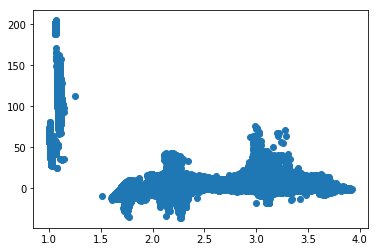

In [67]:
plt.scatter(train_df["distance"],train_df["scalar_coupling_constant"])
